In [1]:
import os
import pandas as pd
import ipdb
from datetime import datetime, time

In [2]:
from index import add_xl_to_csv

In [3]:
%ls data

PeopleFootfall (1).xlsx      weekly-2020-02-10 0925.xlsx


In [4]:
xl_fn = 'data/PeopleFootfall (1).xlsx'
df = (
    add_xl_to_csv(xl_fn, '2020.csv')
#     .assign(date = lambda x: x.datetime.dt.normalize())
)
df

,datetime,library,opening_type,people_in,people_out
0,2020-01-01 00:00:00,Chipping Barnet,closed,0,0
1,2020-01-01 00:00:00,Colindale,closed,0,0
2,2020-01-01 00:00:00,Edgware,closed,0,0
3,2020-01-01 00:00:00,Finchley Church End,closed,0,0
4,2020-01-01 00:00:00,Golders Green,closed,0,0
...,...,...,...,...,...
489,2020-03-01 23:00:00,Colindale,closed,0,0
492,2020-03-01 23:00:00,Edgware,closed,0,0
495,2020-03-01 23:00:00,Golders Green,closed,0,0
498,2020-03-01 23:00:00,North Finchley,closed,0,0


In [5]:
%matplotlib inline
df = df.assign(date = lambda x: x.datetime.dt.normalize())
df

,datetime,library,opening_type,people_in,people_out,date
0,2020-01-01 00:00:00,Chipping Barnet,closed,0,0,2020-01-01
1,2020-01-01 00:00:00,Colindale,closed,0,0,2020-01-01
2,2020-01-01 00:00:00,Edgware,closed,0,0,2020-01-01
3,2020-01-01 00:00:00,Finchley Church End,closed,0,0,2020-01-01
4,2020-01-01 00:00:00,Golders Green,closed,0,0,2020-01-01
...,...,...,...,...,...,...
489,2020-03-01 23:00:00,Colindale,closed,0,0,2020-03-01
492,2020-03-01 23:00:00,Edgware,closed,0,0,2020-03-01
495,2020-03-01 23:00:00,Golders Green,closed,0,0,2020-03-01
498,2020-03-01 23:00:00,North Finchley,closed,0,0,2020-03-01


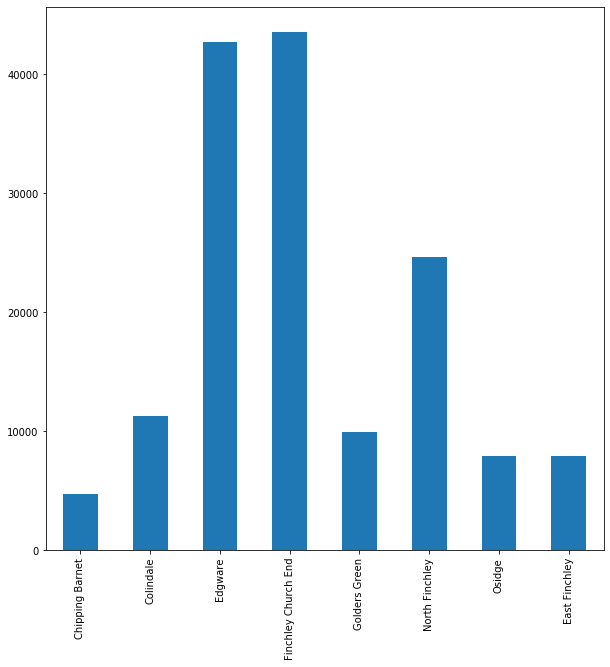

In [16]:
from functools import reduce
libs = df.library.unique()
res = []
for lib in libs:
    col = df.loc[df.library==lib][['datetime', 'people_out']].rename(columns={'people_out': lib}).set_index('datetime')
    res.append(col)
    
pivoted = reduce(lambda x, y: pd.merge(x, y, on = ['datetime']), res)
pivoted.sum().plot(kind='bar', figsize=(10,10))